# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix 
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
data = pd.read_csv("ProductReviews.csv")
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [3]:
data = data.drop(['ReviewTitle'], axis = 1)
data.head()

,ReviewBody,ReviewStar,Product
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


# Wordcount from Reviews

In [4]:
data['ReviewBody'] = data['ReviewBody'].fillna('')

vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    x = {}
    if analyzer(s):
        y = {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            y[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            x[y[index]] = i # x -> word:count
    return  x

data['Word Counts'] = data['ReviewBody'].apply(wordcounts)
data.head()

,ReviewBody,ReviewStar,Product,Word Counts
0,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,"{'10m2': 1, 'about': 1, 'adjust': 1, 'and': 4,..."
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,"{'15': 1, 'also': 2, 'and': 3, 'are': 1, 'as':..."
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"{'36': 1, '999': 1, 'again': 1, 'and': 2, 'at'..."
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,"{'adorable': 1, 'after': 1, 'again': 1, 'am': ..."
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,"{'999': 1, 'amazon': 2, 'awesome': 1, 'bad': 1..."


# Wordcloud

Selected Words
great      1330
awesome    1282
amazing     626
bad         576
love        356
dtype: int64

Product
Sennheiser CX 6.0BT    5000
boAt Rockerz 255       5000
JBL T110BT             1922
JBL T205BT             1411
PTron Intunes           254
Name: Product, dtype: int64


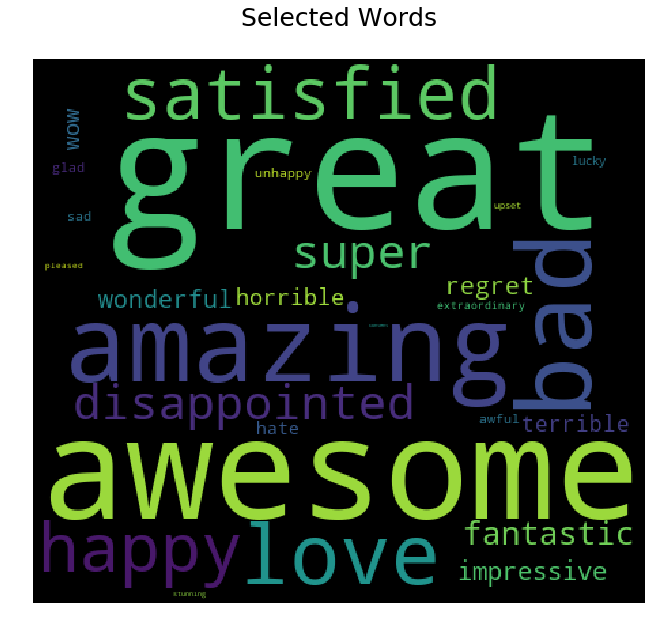

In [5]:
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

#Words Plot from Reviews
def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = data.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nProduct')
print(data['Product'].fillna("Empty").value_counts().iloc[:5])

plt.subplots(figsize=(20,10))
wc0 = WordCloud(background_color='black',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

plt.imshow(wc0)
plt.title('Selected Words\n',size=25)
plt.axis('off')
plt.show()
%matplotlib inline

# Fragmentation of Ratings

In [6]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral(Ignored)
data = data[data['ReviewStar'] != 3]
data['Sentiment'] = data['ReviewStar'] >=4
data.head()

,ReviewBody,ReviewStar,Product,Word Counts,Sentiment
1,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,"{'15': 1, 'also': 2, 'and': 3, 'are': 1, 'as':...",False
2,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"{'36': 1, '999': 1, 'again': 1, 'and': 2, 'at'...",True
3,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,"{'adorable': 1, 'after': 1, 'again': 1, 'am': ...",False
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,"{'999': 1, 'amazon': 2, 'awesome': 1, 'bad': 1...",True
5,"After 11 days, the charging port isn't working...",1,boAt Rockerz 255,"{'11': 2, 'after': 1, 'and': 1, 'been': 1, 'bo...",False


# Preparing train and test datasets

In [7]:
train_data,test_data = train_test_split(data,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['ReviewBody'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['ReviewBody'])
y_test = test_data['Sentiment']

# Logistic Regression Model

In [8]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Prediction Probabilities

In [9]:
df1 = train_data.copy()
df1['Logistic Regression'] = lr.predict_proba(X_train)[:,1]
df1=df1.round(2)
df1.head()

,ReviewBody,ReviewStar,Product,Word Counts,Sentiment,Logistic Regression
12451,Eventing is working fine. Except there is no s...,5,JBL T110BT,"{'accept': 1, 'after': 1, 'also': 1, 'center':...",True,0.61
4897,Sound osmConnectivity goodBass thumping effect...,5,boAt Rockerz 255,"{'effects': 1, 'goodbass': 1, 'it': 1, 'love':...",True,1.00
9515,Using it for last two weeks and there is no pr...,5,Sennheiser CX 6.0BT,"{'1299': 1, 'actual': 1, 'all': 1, 'also': 1, ...",True,0.99
2302,Always knew boat is a great earphone manufactu...,5,boAt Rockerz 255,"{'always': 1, 'boat': 1, 'brainer': 1, 'bucks'...",True,0.96
4560,Super\n,5,boAt Rockerz 255,{'super': 1},True,0.95


# Data Validation

In [10]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2.head()

,ReviewBody,ReviewStar,Product,Word Counts,Sentiment,Logistic Regression
12451,Eventing is working fine. Except there is no s...,5,JBL T110BT,"{'accept': 1, 'after': 1, 'also': 1, 'center':...",True,True
4897,Sound osmConnectivity goodBass thumping effect...,5,boAt Rockerz 255,"{'effects': 1, 'goodbass': 1, 'it': 1, 'love':...",True,True
9515,Using it for last two weeks and there is no pr...,5,Sennheiser CX 6.0BT,"{'1299': 1, 'actual': 1, 'all': 1, 'also': 1, ...",True,True
2302,Always knew boat is a great earphone manufactu...,5,boAt Rockerz 255,"{'always': 1, 'boat': 1, 'brainer': 1, 'bucks'...",True,True
4560,Super\n,5,boAt Rockerz 255,{'super': 1},True,True


# Model Evaluation

Logistic: ROC AUC=0.953


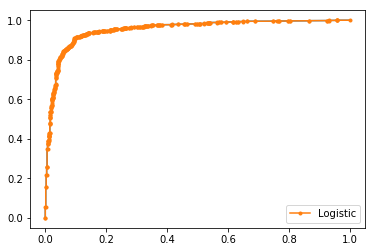

In [11]:
#ROC Curve
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

fig, ax = plt.subplots()
ax.plot(fpr_lr,tpr_lr)
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
lr_auc = roc_auc_score(y_test, pred_lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
plt.legend()
plt.show()

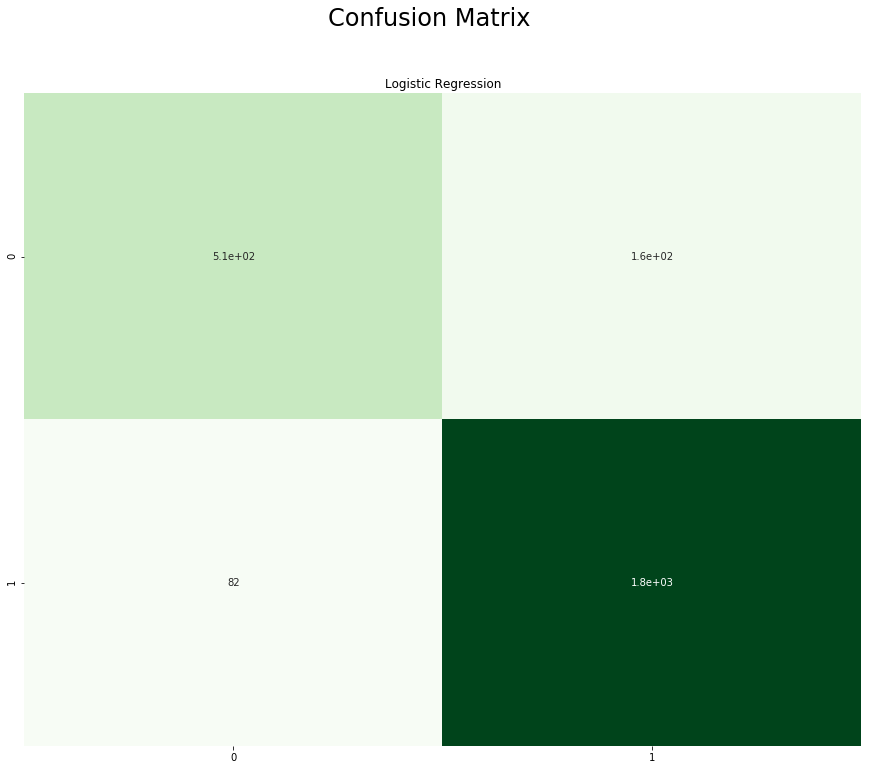

In [12]:
#Confusion Matrix
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrix",fontsize=24)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

From the above confusion matrix, we get an accuracy of 91% from our model

In [13]:
#Accuracy Score
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))

0.905336969224776
